In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

##data downloaded from github 

# Part 1-Predicting Primary Fuel

In [3]:

df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

checking the column names

In [4]:
df.columns


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


checking the null values using heatmap, so to check this in values we will use below command

<AxesSubplot:>

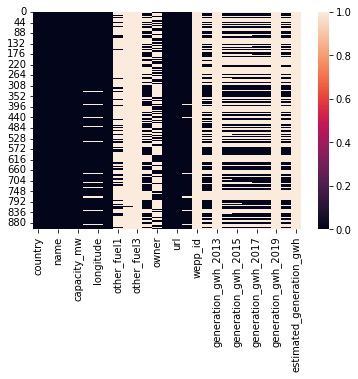

In [6]:
sns.heatmap(df.isnull())

# checking the count of null values

In [7]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# we will require encoding to convert oject into float which we will do later

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

In [9]:
df.describe()


,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


While checking the Null values we have noticed some columns have more than 85% data as NULL so we need to drop them instead of adding Mean or Mode as they will anyways not be contributing since most of the records are null
hence we will first drop other_fuel2,other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019 and estimated_generation_gwh

In [10]:
df1=df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [11]:
df1.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [12]:
df1.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

Here we will replace NULL values with Mean or Mode
some of the column have float values i.e. latitude,logitude,commissioning_year,year_of_capacity_data however we will go with replacing with NULL with Mode due to the charactristic of these columns and for rest we will use Mean

In [13]:
#using simple imputer strategy to replacce NAN values with mode 
import numpy as np
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df1['latitude']=imp.fit_transform(df1['latitude'].values.reshape(-1,1))
df1['longitude']=imp.fit_transform(df1['longitude'].values.reshape(-1,1))
df1['commissioning_year']=imp.fit_transform(df1['commissioning_year'].values.reshape(-1,1))
df1['year_of_capacity_data']=imp.fit_transform(df1['year_of_capacity_data'].values.reshape(-1,1))
df1['other_fuel1']=imp.fit_transform(df1['other_fuel1'].values.reshape(-1,1))
df1['owner']=imp.fit_transform(df1['owner'].values.reshape(-1,1))
df1['geolocation_source']=imp.fit_transform(df1['geolocation_source'].values.reshape(-1,1))
df1['generation_data_source']=imp.fit_transform(df1['generation_data_source'].values.reshape(-1,1))

In [14]:
#using simple imputer strategy to replacce NAN values with mean for rest of the columns
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df1['generation_gwh_2014']=imp.fit_transform(df1['generation_gwh_2014'].values.reshape(-1,1))
df1['generation_gwh_2015']=imp.fit_transform(df1['generation_gwh_2015'].values.reshape(-1,1))
df1['generation_gwh_2016']=imp.fit_transform(df1['generation_gwh_2016'].values.reshape(-1,1))
df1['generation_gwh_2017']=imp.fit_transform(df1['generation_gwh_2017'].values.reshape(-1,1))
df1['generation_gwh_2018']=imp.fit_transform(df1['generation_gwh_2018'].values.reshape(-1,1))

Now checking the null value status

In [15]:
df1.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

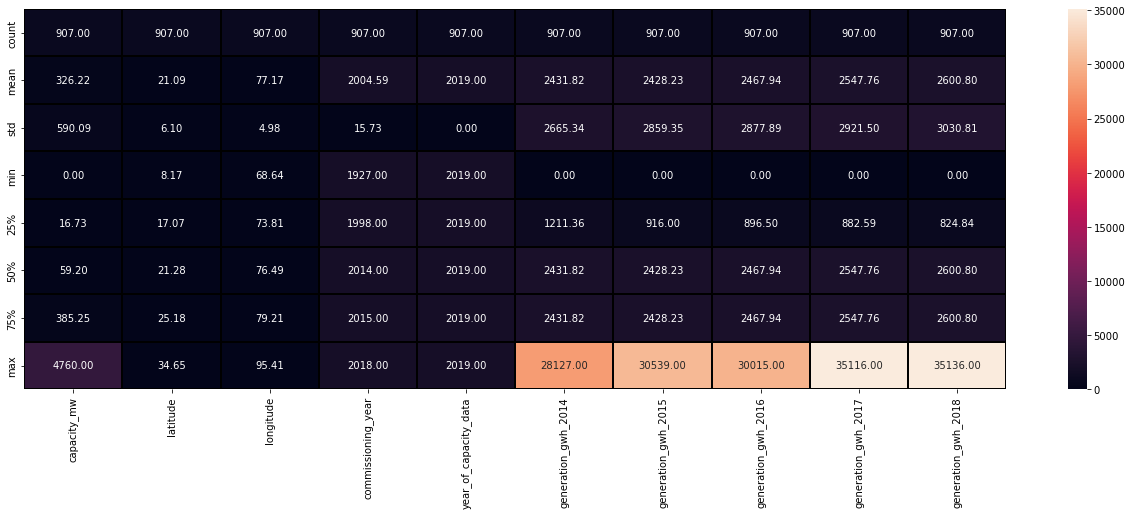

In [16]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df1.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [17]:
df1.shape
#data has 21 columns and 907 rows

(907, 21)

Above we can see data has outliers which we will remove later however we will first convert object datatypes to string using ordinal encoder


In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [19]:
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))

In [20]:
df1.dtypes

country                   float64
country_long              float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel              float64
other_fuel1               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

Above we have replaced null values and then converted all float to string, now we will check correlation and individual column data distribution

In [21]:
#now we will check correlation using tables and charts
dfcorr=df1.corr()
dfcorr


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.332205,0.060240,-0.137256,0.011780,0.040753,-0.074663,-0.041465,...,-1.463951e-02,4.191727e-02,3.622452e-02,NaN,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,NaN
gppd_idnr,NaN,NaN,0.332205,1.000000,-0.335742,-0.107710,-0.372802,0.609180,0.002333,0.511350,...,4.163838e-01,5.970803e-01,-4.641741e-01,NaN,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,NaN
capacity_mw,NaN,NaN,0.060240,-0.335742,1.000000,0.059041,0.215875,-0.380395,0.003105,-0.004072,...,-2.421218e-01,-2.438304e-01,2.048653e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
latitude,NaN,NaN,-0.137256,-0.107710,0.059041,1.000000,0.055202,-0.020203,0.035587,0.035355,...,6.173837e-02,-1.375123e-01,-1.909066e-01,NaN,4.624445e-02,3.872175e-02,3.378729e-02,3.448601e-02,3.454470e-02,NaN
longitude,NaN,NaN,0.011780,-0.372802,0.215875,0.055202,1.000000,-0.368766,0.026114,-0.150742,...,-2.121658e-01,-3.151598e-01,2.208121e-01,NaN,1.773269e-02,2.604610e-02,4.638023e-02,4.922108e-02,4.721134e-02,NaN
primary_fuel,NaN,NaN,0.040753,0.609180,-0.380395,-0.020203,-0.368766,1.000000,0.004912,0.164947,...,5.361263e-02,5.898861e-01,-4.832168e-01,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,NaN
other_fuel1,NaN,NaN,-0.074663,0.002333,0.003105,0.035587,0.026114,0.004912,1.000000,0.056437,...,2.658990e-02,2.815366e-02,-2.140831e-02,NaN,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02,NaN
commissioning_year,NaN,NaN,-0.041465,0.511350,-0.004072,0.035355,-0.150742,0.164947,0.056437,1.000000,...,3.222222e-01,3.421548e-01,-2.599290e-01,NaN,1.100630e-01,1.218816e-01,1.411613e-01,1.413426e-01,1.442491e-01,NaN


<AxesSubplot:>

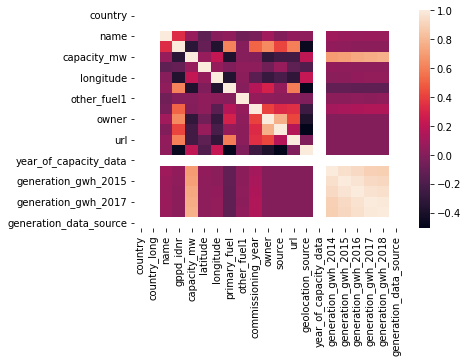

In [22]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [96]:
dfcorr["primary_fuel"].sort_values(ascending=False)

primary_fuel              1.000000
gppd_idnr                 0.609180
url                       0.589886
owner                     0.284296
commissioning_year        0.164947
source                    0.053613
name                      0.040753
other_fuel1               0.004912
latitude                 -0.020203
generation_gwh_2014      -0.124769
generation_gwh_2015      -0.124828
generation_gwh_2016      -0.131051
generation_gwh_2017      -0.132003
generation_gwh_2018      -0.136983
longitude                -0.368766
capacity_mw              -0.380395
geolocation_source       -0.483217
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

From the above checks using correlation , we do not need country , country_long,year_of_capacity_data,generation_data_source as they have no contribution in this model and also source , name , other_fuel1,latitude are very low correlated with our output , so we will drop all of them to make the data claeaner


In [23]:
df2=df1.drop(["country","country_long","year_of_capacity_data","generation_data_source","source","name","other_fuel1","latitude"],axis=1)
df2

,gppd_idnr,capacity_mw,longitude,primary_fuel,commissioning_year,owner,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657.0,2.5,73.2407,6.0,2011.0,229.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519.0,98.0,74.6090,1.0,2015.0,258.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853.0,39.2,69.3732,7.0,2015.0,2.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0.0,135.0,91.3602,2.0,2004.0,5.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1.0,1800.0,82.4091,1.0,2015.0,5.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,1600.0,77.3568,1.0,2016.0,5.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822.0,3.0,78.1654,6.0,2015.0,114.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891.0,25.5,75.5811,7.0,2015.0,5.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539.0,80.0,73.7477,1.0,2015.0,91.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


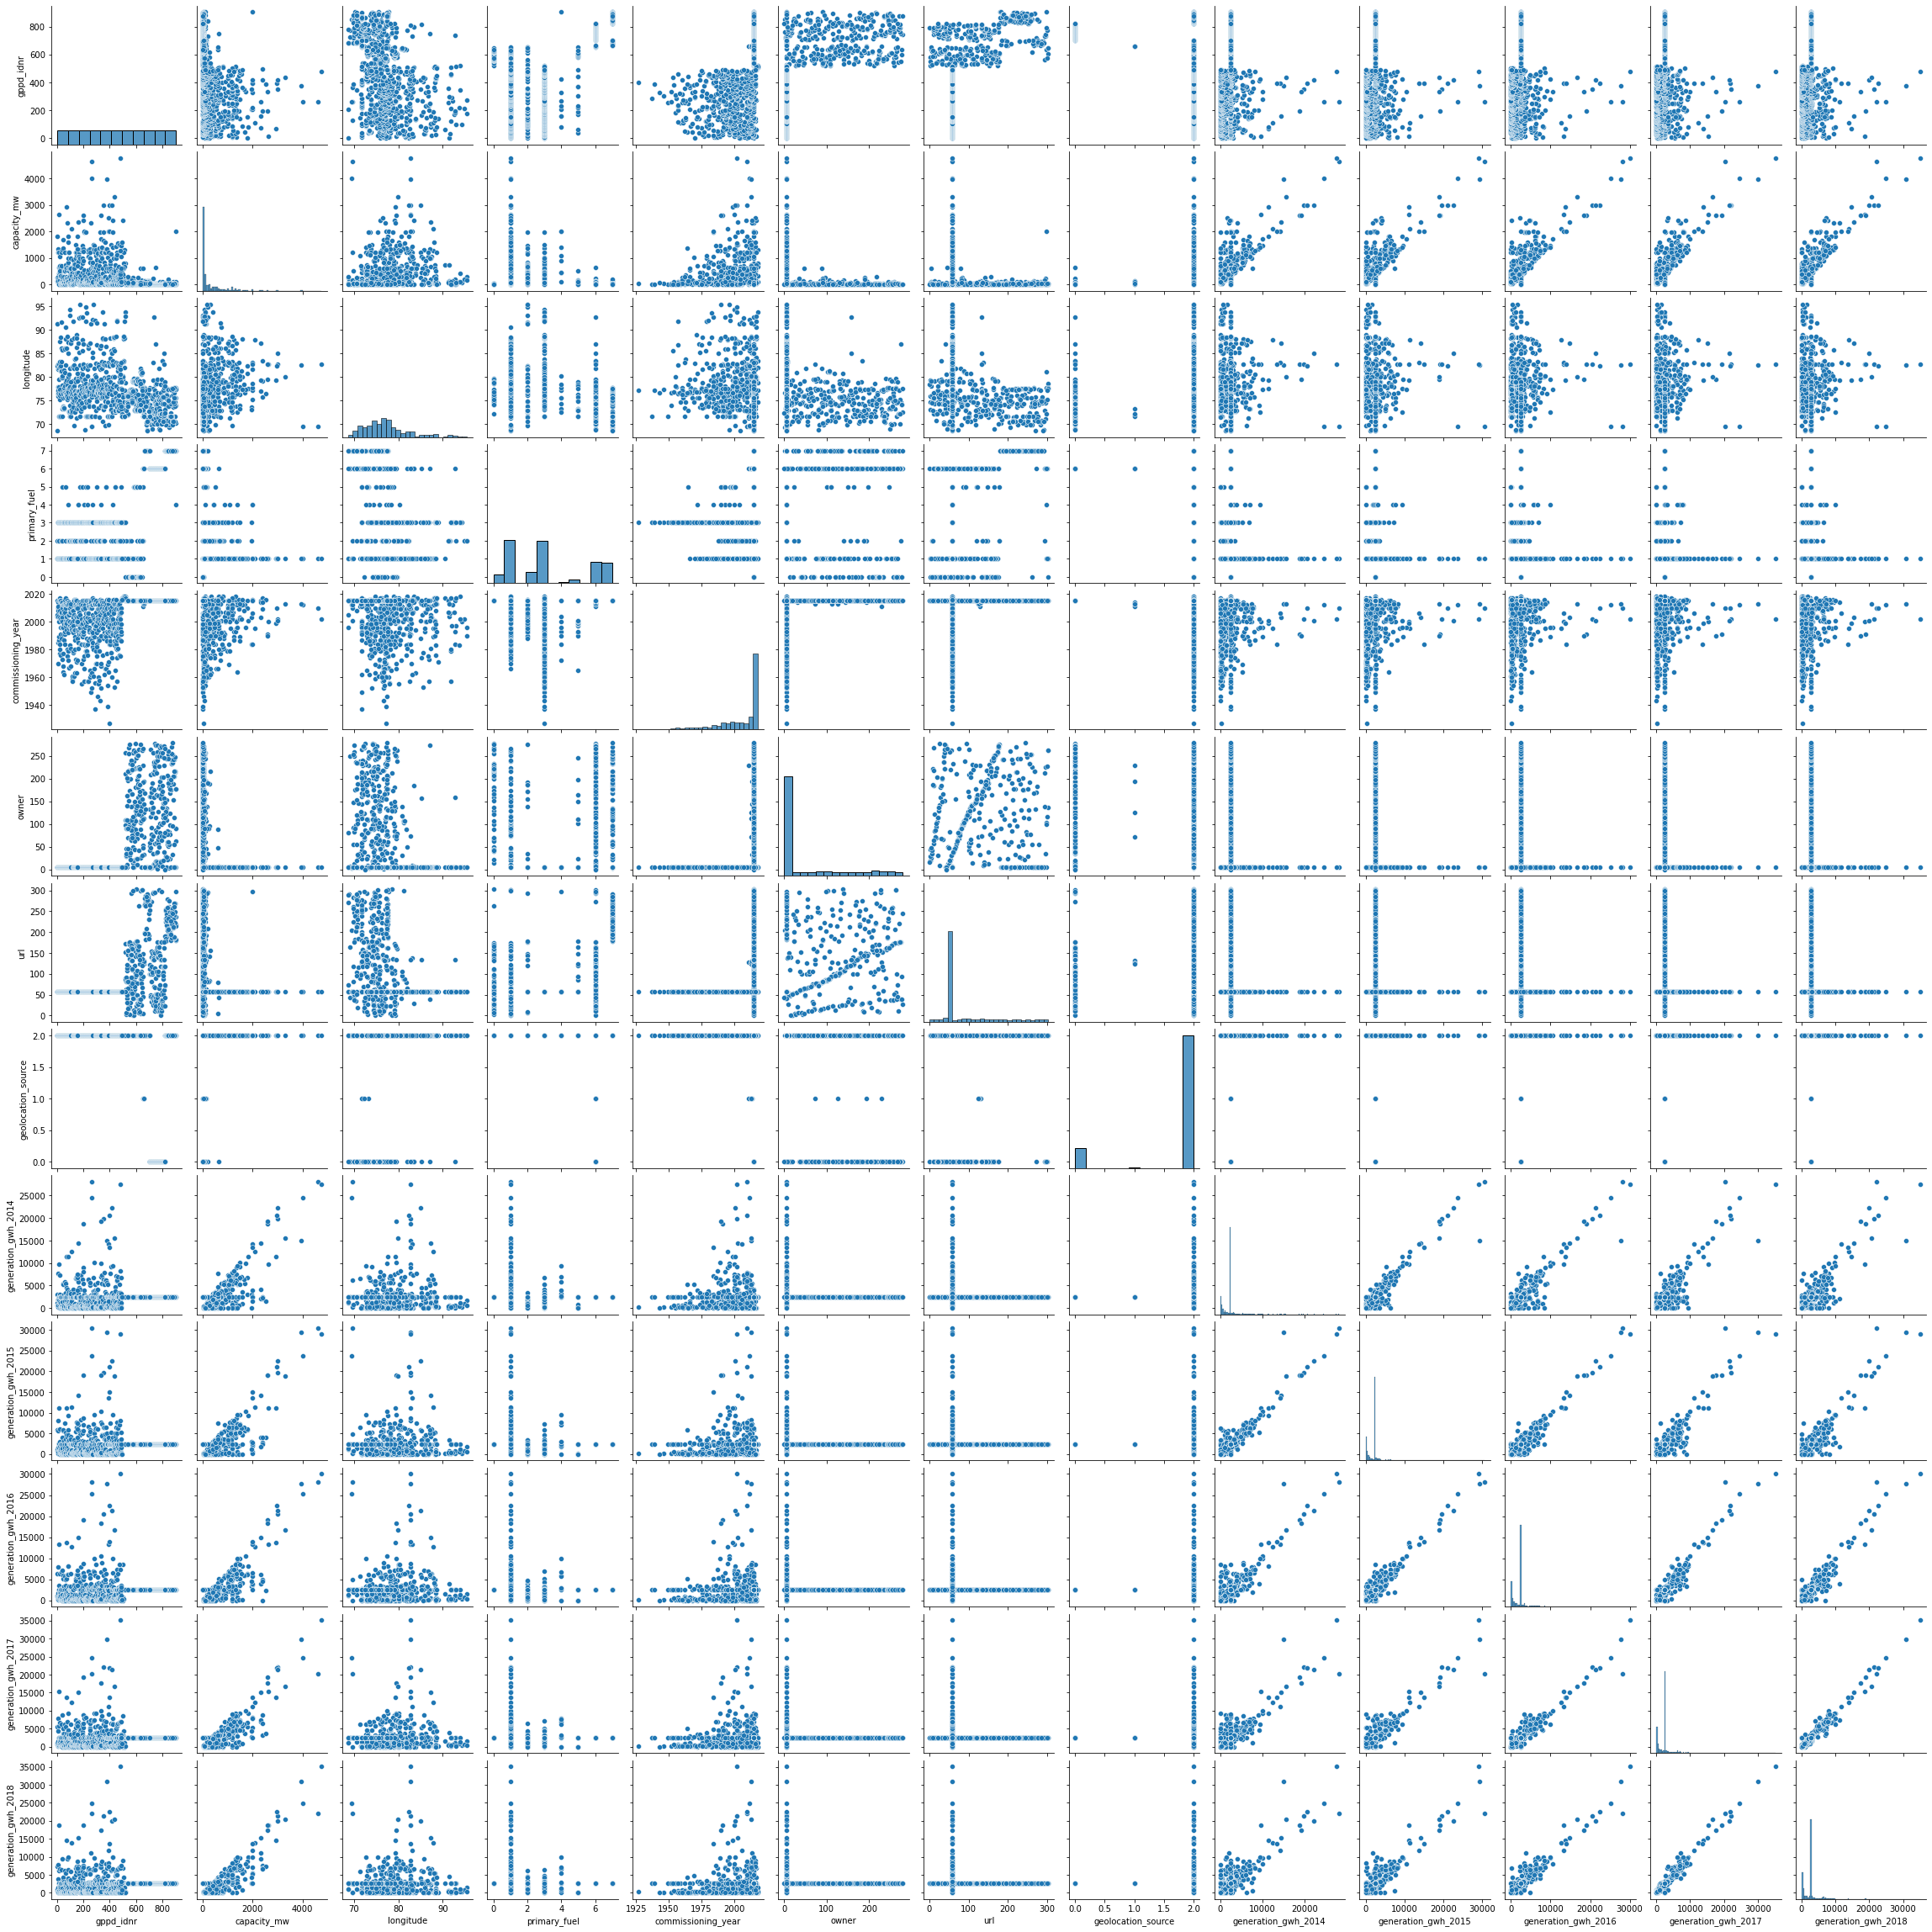

In [24]:
sns.pairplot(df2)
#to visually see positive , negative colrrelat

In [25]:
df2.columns

Index(['gppd_idnr', 'capacity_mw', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

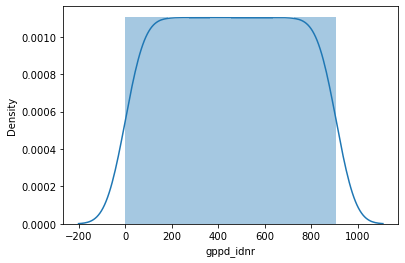

In [26]:
#we will check the data distribution using distplots
sns.distplot(df2['gppd_idnr'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

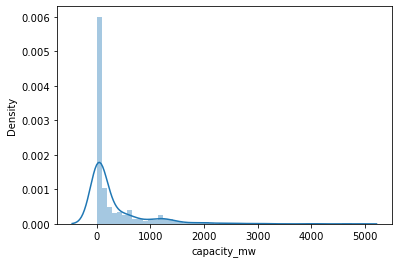

In [27]:
sns.distplot(df2['capacity_mw'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

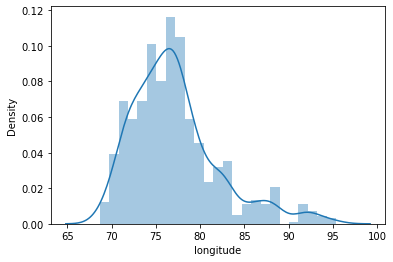

In [28]:
sns.distplot(df2['longitude'])

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

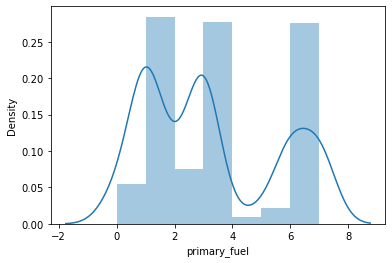

In [29]:
sns.distplot(df2['primary_fuel'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

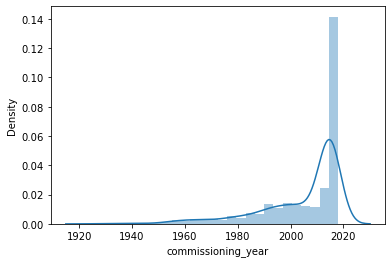

In [30]:
sns.distplot(df2['commissioning_year'])

<AxesSubplot:xlabel='owner', ylabel='Density'>

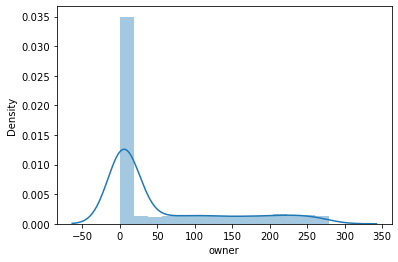

In [31]:
sns.distplot(df2['owner'])

<AxesSubplot:xlabel='url', ylabel='Density'>

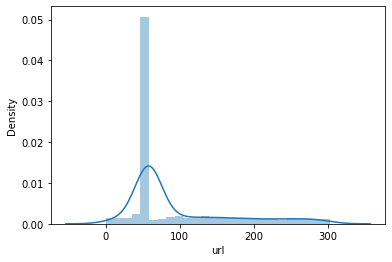

In [32]:
sns.distplot(df2['url'])

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

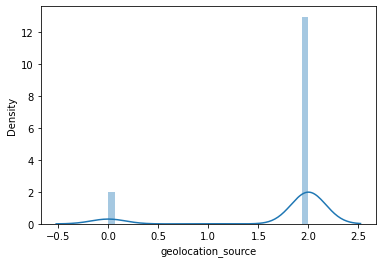

In [33]:
sns.distplot(df2['geolocation_source'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

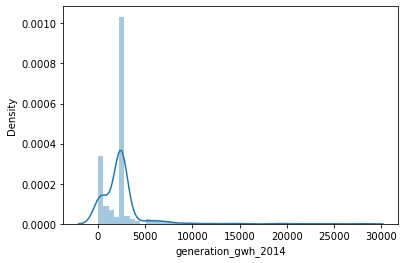

In [34]:
sns.distplot(df2['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

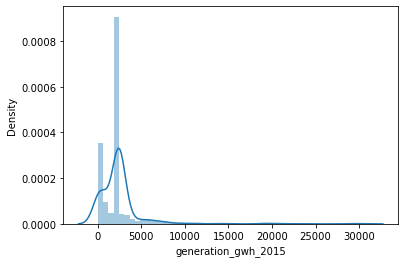

In [35]:
sns.distplot(df2['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

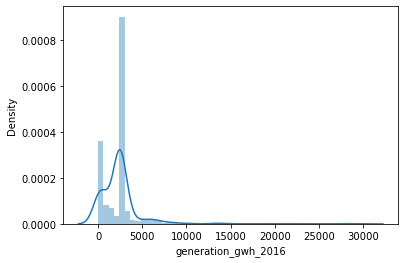

In [36]:
sns.distplot(df2['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

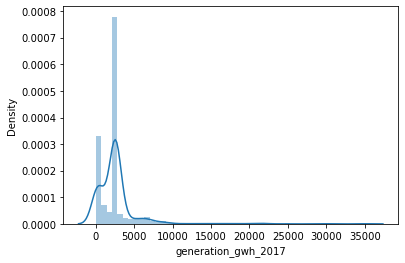

In [37]:
sns.distplot(df2['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

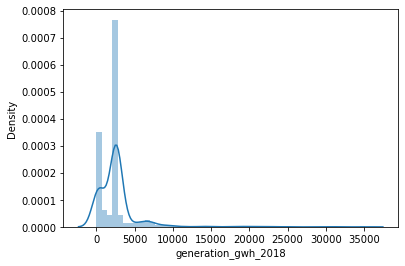

In [38]:
sns.distplot(df2['generation_gwh_2018'])

gppd_idnr                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
capacity_mw            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
longitude              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
primary_fuel           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
commissioning_year     AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
owner                  AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
url                    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
geolocation_source           AxesSubplot(0.125,0.125;0.0945122x0.343182)
generation_gwh_2014       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
generation_gwh_2015       AxesSubplot(0.351829,0.125;0.0945122x0.343182)
generation_gwh_2016       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
generation_gwh_2017       AxesSubplot(0.578659,0.125;0.0945122x0.343182)
generation_gwh_2018       AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

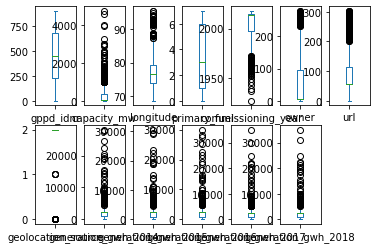

In [39]:
df2.plot(kind='box',subplots=True,layout=(2,7))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

As we have outliers in the data so we need to remove outliers first

In [40]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

,gppd_idnr,capacity_mw,longitude,primary_fuel,commissioning_year,owner,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.779137,0.548908,0.790446,1.225688,0.407327,2.095328,0.476673,1.083349,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
1,0.252074,0.386977,0.515337,0.967877,0.661679,2.446913,1.116401,0.394241,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
2,1.527719,0.486679,1.568043,1.664401,0.661679,0.656734,1.571318,0.394241,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
3,1.730142,0.324240,2.852648,0.529164,0.037788,0.620363,0.518459,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.726323,2.498942,1.052946,0.967877,0.661679,0.620363,0.518459,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.145133,2.159821,0.037134,0.967877,0.725267,0.620363,0.518459,0.394241,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,1.409321,0.548060,0.199710,1.225688,0.661679,0.701112,1.030242,2.560940,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
904,1.672853,0.509909,0.319887,1.664401,0.661679,0.620363,2.353208,0.394241,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
905,0.328460,0.417498,0.688509,0.967877,0.661679,0.422268,0.177271,0.394241,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16


In [41]:
z=np.abs(zscore(df2))

In [42]:
z.shape

(907, 13)

In [43]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 308, 308, 308,
       308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364, 364,
       364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
       493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538,
       541, 573, 577, 583, 601, 621, 638, 648, 648, 648, 648, 648, 648,
       657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695, 695, 706,
       709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726,
       726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807,
       808, 808, 808, 808, 808, 808, 818, 848, 880, 880, 880, 880, 880,
       880], dtype=int64), array([ 1,  9, 10, 11, 12,  1,  8,  9, 10, 11, 12,  1,  8,  2,  2,  1,  8,
        9, 10, 11, 12,  4,  2,  1,  8,  9, 10, 11, 12,  2,  2,  2,  4,  2,
        1,  1,  8,  9, 10, 11, 12,  4,  1,  2,  2,  4,  4,  4,  1,  4,  1,
        8,  9, 10, 11, 12, 

In [44]:
len(np.where(z>3)[0])

131

In [45]:
df3=df2[(z<3).all(axis=1)]

In [46]:
print("old dataframe",df2.shape)
print("new dataframe",df3.shape)
print("total dropped",df2.shape[0]-df3.shape[0])

old dataframe (907, 13)
new dataframe (852, 13)
total dropped 55


In [47]:
loss_percent=(907-852)/907*100
print(loss_percent,"%")
#here by removing the outliers loosign 8% of data which is fine as it will help in gettign better model accuracy

6.063947078280044 %


In [48]:
#we will now check skewness in data
df3.skew()

gppd_idnr             -0.075354
capacity_mw            1.985422
longitude              0.969427
primary_fuel           0.410634
commissioning_year    -1.523132
owner                  1.276158
url                    1.416428
geolocation_source    -2.068499
generation_gwh_2014    1.523032
generation_gwh_2015    1.388110
generation_gwh_2016    1.411103
generation_gwh_2017    1.277521
generation_gwh_2018    1.313876
dtype: float64

In [49]:
# We will break data into input and output and then remove skewness
x=df3.drop("primary_fuel",axis=1)
y=df3["primary_fuel"]

In [50]:
x

,gppd_idnr,capacity_mw,longitude,commissioning_year,owner,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657.0,2.5,73.2407,2011.0,229.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519.0,98.0,74.6090,2015.0,258.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853.0,39.2,69.3732,2015.0,2.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0.0,135.0,91.3602,2004.0,5.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1.0,1800.0,82.4091,2015.0,5.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,1600.0,77.3568,2016.0,5.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822.0,3.0,78.1654,2015.0,114.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891.0,25.5,75.5811,2015.0,5.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539.0,80.0,73.7477,2015.0,91.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [51]:
y

0      6.0
1      1.0
2      7.0
3      2.0
4      1.0
      ... 
902    1.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: primary_fuel, Length: 852, dtype: float64

In [52]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)


,Variables,VIF Factor
0,gppd_idnr,12.165689
1,capacity_mw,3.229233
2,longitude,360.855960
3,commissioning_year,393.231184
4,owner,2.657501
5,url,5.296032
6,geolocation_source,11.065074
7,generation_gwh_2014,16.032728
8,generation_gwh_2015,30.095130
9,generation_gwh_2016,35.359605


generation_gwh_2017 and generation_gwh_2018 have very close VIF so we will consider latest year and drop the old one

In [53]:
x1=x.drop("generation_gwh_2017",axis=1)
x1

,gppd_idnr,capacity_mw,longitude,commissioning_year,owner,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,657.0,2.5,73.2407,2011.0,229.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2600.804099
1,519.0,98.0,74.6090,2015.0,258.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2600.804099
2,853.0,39.2,69.3732,2015.0,2.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2600.804099
3,0.0,135.0,91.3602,2004.0,5.0,58.0,2.0,617.789264,843.747000,886.004428,626.239128
4,1.0,1800.0,82.4091,2015.0,5.0,58.0,2.0,3035.550000,5916.370000,6243.000000,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,1600.0,77.3568,2016.0,5.0,58.0,2.0,2431.823590,0.994875,233.596650,686.500000
903,822.0,3.0,78.1654,2015.0,114.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2600.804099
904,891.0,25.5,75.5811,2015.0,5.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2600.804099
905,539.0,80.0,73.7477,2015.0,91.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2600.804099


In [54]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [55]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0    -0.321995
1     0.015935
2     0.033733
3    -1.088579
4     0.430096
5     0.061644
6    -2.041749
7    -0.245978
8    -0.309801
9    -0.310337
10   -0.355407
dtype: float64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

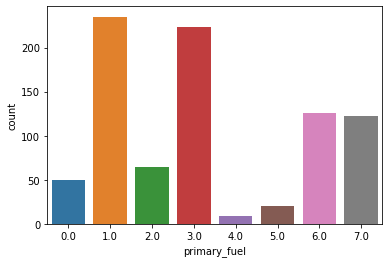

In [56]:
sns.countplot(y)

As this is classification problem and we can see imbalance data so will use Smote technique to balance the data

In [57]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [58]:
smt=SMOTE()
x3,y1=smt.fit_resample(x2,y)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

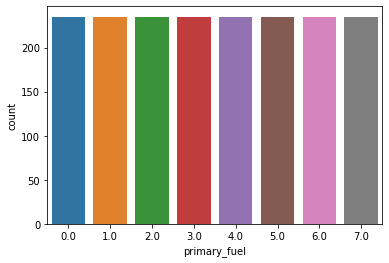

In [59]:
sns.countplot(y1)

In [60]:
#using scaling technique for scaling of independent data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x3=st.fit_transform(x3)
x3

array([[ 0.76080553, -1.77085441, -0.74265102, ...,  0.34048427,
         0.35196099,  0.37615246],
       [ 0.26841621,  0.190239  , -0.27439773, ...,  0.34048427,
         0.35196099,  0.37615246],
       [ 1.41667139, -0.32129306, -2.3881296 , ...,  0.34048427,
         0.35196099,  0.37615246],
       ...,
       [ 0.85201218, -0.54682686, -0.47232539, ...,  0.34048427,
         0.35196099,  0.37615246],
       [ 1.47566252, -1.33384734, -1.33920109, ...,  0.34048427,
         0.35196099,  0.37615246],
       [ 1.52337868, -0.64325461, -0.50586273, ...,  0.34048427,
         0.35196099,  0.37615246]])

Now we have our input and output ready to be tested for model , this is a classification problem so will go with Multinomial Naive Bayes first

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
rf=RandomForestClassifier()
mnb=MultinomialNB()

In [62]:
#finding best random state
for i in range(0,100):
    x3_train,x3_test,y1_train,y1_test=train_test_split(x3,y1,test_size=0.2,random_state=i)
    rf.fit(x3_train,y1_train)
    pred_train=rf.predict(x3_train)
    pred_test=rf.predict(x3_test)
    print(f"at random state{i},the training accuracy is:- {accuracy_score(y1_train,pred_train)}")
    print(f"at random state{i},the testing accuracy is:- {accuracy_score(y1_test,pred_test)}")
    print("\n")

at random state0,the training accuracy is:- 1.0
at random state0,the testing accuracy is:- 0.9175531914893617


at random state1,the training accuracy is:- 1.0
at random state1,the testing accuracy is:- 0.9361702127659575


at random state2,the training accuracy is:- 1.0
at random state2,the testing accuracy is:- 0.9148936170212766


at random state3,the training accuracy is:- 1.0
at random state3,the testing accuracy is:- 0.8829787234042553


at random state4,the training accuracy is:- 1.0
at random state4,the testing accuracy is:- 0.925531914893617


at random state5,the training accuracy is:- 1.0
at random state5,the testing accuracy is:- 0.9202127659574468


at random state6,the training accuracy is:- 1.0
at random state6,the testing accuracy is:- 0.9042553191489362


at random state7,the training accuracy is:- 1.0
at random state7,the testing accuracy is:- 0.9281914893617021


at random state8,the training accuracy is:- 1.0
at random state8,the testing accuracy is:- 0.920212765957

at random state72,the training accuracy is:- 1.0
at random state72,the testing accuracy is:- 0.9148936170212766


at random state73,the training accuracy is:- 1.0
at random state73,the testing accuracy is:- 0.925531914893617


at random state74,the training accuracy is:- 1.0
at random state74,the testing accuracy is:- 0.8962765957446809


at random state75,the training accuracy is:- 1.0
at random state75,the testing accuracy is:- 0.8962765957446809


at random state76,the training accuracy is:- 1.0
at random state76,the testing accuracy is:- 0.9281914893617021


at random state77,the training accuracy is:- 1.0
at random state77,the testing accuracy is:- 0.9122340425531915


at random state78,the training accuracy is:- 1.0
at random state78,the testing accuracy is:- 0.9228723404255319


at random state79,the training accuracy is:- 1.0
at random state79,the testing accuracy is:- 0.9122340425531915


at random state80,the training accuracy is:- 1.0
at random state80,the testing accuracy i

In [63]:
#We will use random state 99 which has very close result between training and test accuracy
rfs=RandomForestClassifier(n_estimators=100,random_state=99)
rfs.fit(x3_train,y1_train)
predrf=rfs.predict(x3_test)
print(accuracy_score(y1_test,predrf))
print(confusion_matrix(y1_test,predrf))
print(classification_report(y1_test,predrf))
cvscore=cross_val_score(rfs,x3,y1,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.925531914893617
[[50  0  0  0  0  0  0  0]
 [ 2 36  2  5  2  1  0  0]
 [ 0  1 39  4  1  4  0  0]
 [ 0  0  3 39  1  0  0  0]
 [ 0  0  0  1 41  1  0  0]
 [ 0  0  0  0  0 46  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        50
         1.0       0.97      0.75      0.85        48
         2.0       0.89      0.80      0.84        49
         3.0       0.80      0.91      0.85        43
         4.0       0.91      0.95      0.93        43
         5.0       0.88      1.00      0.94        46
         6.0       1.00      1.00      1.00        46
         7.0       1.00      1.00      1.00        51

    accuracy                           0.93       376
   macro avg       0.93      0.93      0.92       376
weighted avg       0.93      0.93      0.92       376

cross val score: 0.9047872340425533


In [64]:
#using Kneighbors Classifier to check results
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x3_train,y1_train)
knn.score(x3_train,y1_train)
predknn=knn.predict(x3_test)
print(accuracy_score(y1_test,predknn))
print(confusion_matrix(y1_test,predknn))
print(classification_report(y1_test,predknn))
cvscore1=cross_val_score(knn,x3,y1,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.901595744680851
[[50  0  0  0  0  0  0  0]
 [ 5 25  3  7  6  2  0  0]
 [ 0  0 42  1  1  4  0  1]
 [ 0  1  3 38  0  1  0  0]
 [ 0  0  0  0 43  0  0  0]
 [ 0  0  2  0  0 44  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        50
         1.0       0.96      0.52      0.68        48
         2.0       0.84      0.86      0.85        49
         3.0       0.83      0.88      0.85        43
         4.0       0.86      1.00      0.92        43
         5.0       0.86      0.96      0.91        46
         6.0       1.00      1.00      1.00        46
         7.0       0.98      1.00      0.99        51

    accuracy                           0.90       376
   macro avg       0.91      0.90      0.89       376
weighted avg       0.91      0.90      0.89       376

cross val score: 0.8569148936170213


In [65]:
#using support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x3_train,y1_train)
svc.score(x3_train,y1_train)
predsvc=svc.predict(x3_test)
print(accuracy_score(y1_test,predsvc))
print(confusion_matrix(y1_test,predsvc))
print(classification_report(y1_test,predsvc))
cvscore2=cross_val_score(svc,x3,y1,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.8590425531914894
[[50  0  0  0  0  0  0  0]
 [10 26  1  4  5  2  0  0]
 [ 1  7 32  4  0  5  0  0]
 [ 0  4  5 32  1  1  0  0]
 [ 0  0  0  0 43  0  0  0]
 [ 3  0  0  0  0 43  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        50
         1.0       0.70      0.54      0.61        48
         2.0       0.84      0.65      0.74        49
         3.0       0.80      0.74      0.77        43
         4.0       0.88      1.00      0.93        43
         5.0       0.84      0.93      0.89        46
         6.0       1.00      1.00      1.00        46
         7.0       1.00      1.00      1.00        51

    accuracy                           0.86       376
   macro avg       0.86      0.86      0.85       376
weighted avg       0.86      0.86      0.85       376

cross val score: 0.826063829787234


In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x3_train,y1_train)
dtc.score(x3_train,y1_train)
preddtc=dtc.predict(x3_test)
print(accuracy_score(y1_test,preddtc))
print(confusion_matrix(y1_test,preddtc))
print(classification_report(y1_test,preddtc))
cvscore3=cross_val_score(dtc,x3,y1,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.8882978723404256
[[46  3  1  0  0  0  0  0]
 [ 1 34  5  6  0  2  0  0]
 [ 0  2 38  5  0  4  0  0]
 [ 0  2  4 36  1  0  0  0]
 [ 0  0  1  1 41  0  0  0]
 [ 0  0  4  0  0 42  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        50
         1.0       0.83      0.71      0.76        48
         2.0       0.72      0.78      0.75        49
         3.0       0.75      0.84      0.79        43
         4.0       0.98      0.95      0.96        43
         5.0       0.88      0.91      0.89        46
         6.0       1.00      1.00      1.00        46
         7.0       1.00      1.00      1.00        51

    accuracy                           0.89       376
   macro avg       0.89      0.89      0.89       376
weighted avg       0.89      0.89      0.89       376

cross val score: 0.8601063829787234


In [67]:
#Trying to boost the learning of decision tree classifier, estimators by default is 50

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x3_train,y1_train)
ad_pred=ad.predict(x3_test)
print(accuracy_score(y1_test,ad_pred))
print(confusion_matrix(y1_test,ad_pred))
print(classification_report(y1_test,ad_pred))
cvscore4=cross_val_score(ad,x3,y1,cv=5)
cvm4=cvscore4.mean()
print("cross val score:",cvm4)

0.526595744680851
[[ 0  0  0  0  0 50  0  0]
 [ 0  0  0 20 16 12  0  0]
 [ 0  1  0 41  2  5  0  0]
 [ 0  0  0 41  2  0  0  0]
 [ 0  0  0  2 41  0  0  0]
 [ 0  0  0 26  0 20  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  1  0  0 50]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        48
         2.0       0.00      0.00      0.00        49
         3.0       0.32      0.95      0.47        43
         4.0       0.66      0.95      0.78        43
         5.0       0.23      0.43      0.30        46
         6.0       1.00      1.00      1.00        46
         7.0       1.00      0.98      0.99        51

    accuracy                           0.53       376
   macro avg       0.40      0.54      0.44       376
weighted avg       0.40      0.53      0.44       376

cross val score: 0.5196808510638298


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x3_train,y1_train)
gb_pred=gb.predict(x3_test)
print(accuracy_score(y1_test,gb_pred))
print(confusion_matrix(y1_test,gb_pred))
print(classification_report(y1_test,gb_pred))
cvscore5=cross_val_score(gb,x3,y1,cv=5)
cvm5=cvscore5.mean()
print("cross val score:",cvm5)

0.901595744680851
[[49  0  1  0  0  0  0  0]
 [ 2 30  4  5  4  3  0  0]
 [ 0  1 40  3  1  4  0  0]
 [ 0  1  2 39  1  0  0  0]
 [ 0  0  0  0 42  1  0  0]
 [ 0  2  1  1  0 42  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        50
         1.0       0.88      0.62      0.73        48
         2.0       0.83      0.82      0.82        49
         3.0       0.81      0.91      0.86        43
         4.0       0.88      0.98      0.92        43
         5.0       0.84      0.91      0.87        46
         6.0       1.00      1.00      1.00        46
         7.0       1.00      1.00      1.00        51

    accuracy                           0.90       376
   macro avg       0.90      0.90      0.90       376
weighted avg       0.90      0.90      0.90       376

cross val score: 0.8877659574468085


Hypertuning below for the algorithm selected as Random Forest Classifier

In [76]:
RandomForestClassifier()

RandomForestClassifier()

In [82]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini','entropy']}

In [83]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x3_train,y1_train)
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt'}

In [84]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [86]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt')

In [90]:
GCV_pred=GCV.best_estimator_.predict(x3_test)
accuracy_score(y1_test,GCV_pred)
print(accuracy_score(y1_test,GCV_pred))
print(confusion_matrix(y1_test,GCV_pred))
print(classification_report(y1_test,GCV_pred))
cvscore6=cross_val_score(GCV.best_estimator_,x3,y1,cv=5)
cvm6=cvscore6.mean()
print("cross val score:",cvm6)

0.925531914893617
[[50  0  0  0  0  0  0  0]
 [ 2 35  2  5  3  1  0  0]
 [ 0  1 39  5  0  4  0  0]
 [ 0  0  2 40  1  0  0  0]
 [ 0  0  0  1 41  1  0  0]
 [ 0  0  0  0  0 46  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        50
         1.0       0.97      0.73      0.83        48
         2.0       0.91      0.80      0.85        49
         3.0       0.78      0.93      0.85        43
         4.0       0.91      0.95      0.93        43
         5.0       0.88      1.00      0.94        46
         6.0       1.00      1.00      1.00        46
         7.0       1.00      1.00      1.00        51

    accuracy                           0.93       376
   macro avg       0.93      0.93      0.92       376
weighted avg       0.93      0.93      0.92       376

cross val score: 0.9026595744680851


-------------------------------------------------------------------------------------------------
RandomForestClassifier 92% accuracy score ,93 % accuracy in F1 score and 90 % Cross Val score 

KNeighborsClassifier 90 % accuracy , 90 % accuracy in F1 score and 85 % Cross Val score 

support vector classifier using kernel as poly 85 % accuracy , 86 % accuracy in F1 score and 82 % Cross Val score 

DecisionTreeClassifier 88% accuracy , 89 % accuracy in F1 score and 86 % Cross Val score 

AdaBoostClassifier 52 % accuracy , 53 % accuracy in F1 score and 51 % Cross Val score 

GradientBoostingClassifier 90 % accuracy , 90 % accuracy in F1 score and 88 % Cross Val score 

By doing Hypertuning using RandomForestClassifier with best param 92 % accuracy , 93 % accuracy in F1 score and 90 % Cross Val score

We select Hypertuned Random Forest Classifier which has 92% accuracy with 93% F1 and 90% cross val score as final model

Not able to plot AUC Roc curve due to muticlass output as this works for Binary models

---------------------------------------------------------------------------------------------------

In [91]:
#we will save this model
import pickle

In [92]:
filename='primaryfuelmodel.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [93]:
#Conclusion 
loaded_model=pickle.load(open('primaryfuelmodel.pkl','rb'))
result=loaded_model.score(x3_test,y1_test)
print(result)
                        

0.925531914893617


In [94]:
#conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:],pred_decision[:]],index=["Predicted","Original"])
#predicting the sales using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x3_test)[:],predrf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
Predicted,4.0,4.0,3.0,1.0,0.0,0.0,0.0,7.0,4.0,2.0,...,7.0,5.0,0.0,5.0,2.0,7.0,5.0,7.0,0.0,0.0
Original,4.0,4.0,3.0,1.0,0.0,0.0,0.0,7.0,4.0,2.0,...,7.0,5.0,0.0,5.0,2.0,7.0,5.0,7.0,0.0,0.0


# Part 1-Predicting Capacity mw

In the begining we had dropped some of the columns which had more than 85% null so will continue from the dataset df1 which had those columns removed


In [97]:

df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,0.0,657.0,2.5,28.1839,73.2407,6.0,2.0,2011.0,...,109.0,128.0,1.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
1,0.0,0.0,1.0,519.0,98.0,24.7663,74.6090,1.0,2.0,2015.0,...,174.0,173.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
2,0.0,0.0,2.0,853.0,39.2,21.9038,69.3732,7.0,2.0,2015.0,...,21.0,205.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2.0,2.0,2004.0,...,22.0,58.0,2.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,2015.0,...,22.0,58.0,2.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,902.0,491.0,1600.0,16.2949,77.3568,1.0,2.0,2016.0,...,22.0,58.0,2.0,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0.0
903,0.0,0.0,903.0,822.0,3.0,12.8932,78.1654,6.0,2.0,2015.0,...,77.0,22.0,0.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
904,0.0,0.0,904.0,891.0,25.5,15.2758,75.5811,7.0,2.0,2015.0,...,21.0,260.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
905,0.0,0.0,905.0,539.0,80.0,24.3500,73.7477,1.0,2.0,2015.0,...,59.0,82.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0


In [98]:
df1.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [99]:
df1.dtypes

country                   float64
country_long              float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel              float64
other_fuel1               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

Above tells all datatypes are float and none of them is NULL
Our target is capacity mw which is a continues variable 

In [23]:
#as we will predict capacity_mw so need to check its correlation with other data columns
dfcorr["capacity_mw"].sort_values(ascending=False)

capacity_mw               1.000000
generation_gwh_2018       0.773456
generation_gwh_2017       0.757585
generation_gwh_2016       0.742221
generation_gwh_2015       0.711190
generation_gwh_2014       0.694350
longitude                 0.215875
geolocation_source        0.204865
name                      0.060240
latitude                  0.059041
other_fuel1               0.003105
commissioning_year       -0.004072
source                   -0.242122
url                      -0.243830
owner                    -0.311048
gppd_idnr                -0.335742
primary_fuel             -0.380395
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64


From the above checks using correlation , we do not need country , country_long,year_of_capacity_data,generation_data_source as they have no contribution in this model ,
source and URl have same contribution
name,latitude,other_fuel1,commissioning_year are very low correlated
hence we will drop below columns from the data
country,country_long,year_of_capacity_data,generation_data_source,URl,name,latitude,other_fuel1,commissioning_year


In [30]:
df2=df1.drop(["country","country_long","year_of_capacity_data","generation_data_source","url","name","other_fuel1","latitude","commissioning_year"],axis=1)
df2

,gppd_idnr,capacity_mw,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657.0,2.5,73.2407,6.0,229.0,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519.0,98.0,74.6090,1.0,258.0,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853.0,39.2,69.3732,7.0,2.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0.0,135.0,91.3602,2.0,5.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1.0,1800.0,82.4091,1.0,5.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,1600.0,77.3568,1.0,5.0,22.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822.0,3.0,78.1654,6.0,114.0,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891.0,25.5,75.5811,7.0,5.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539.0,80.0,73.7477,1.0,91.0,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


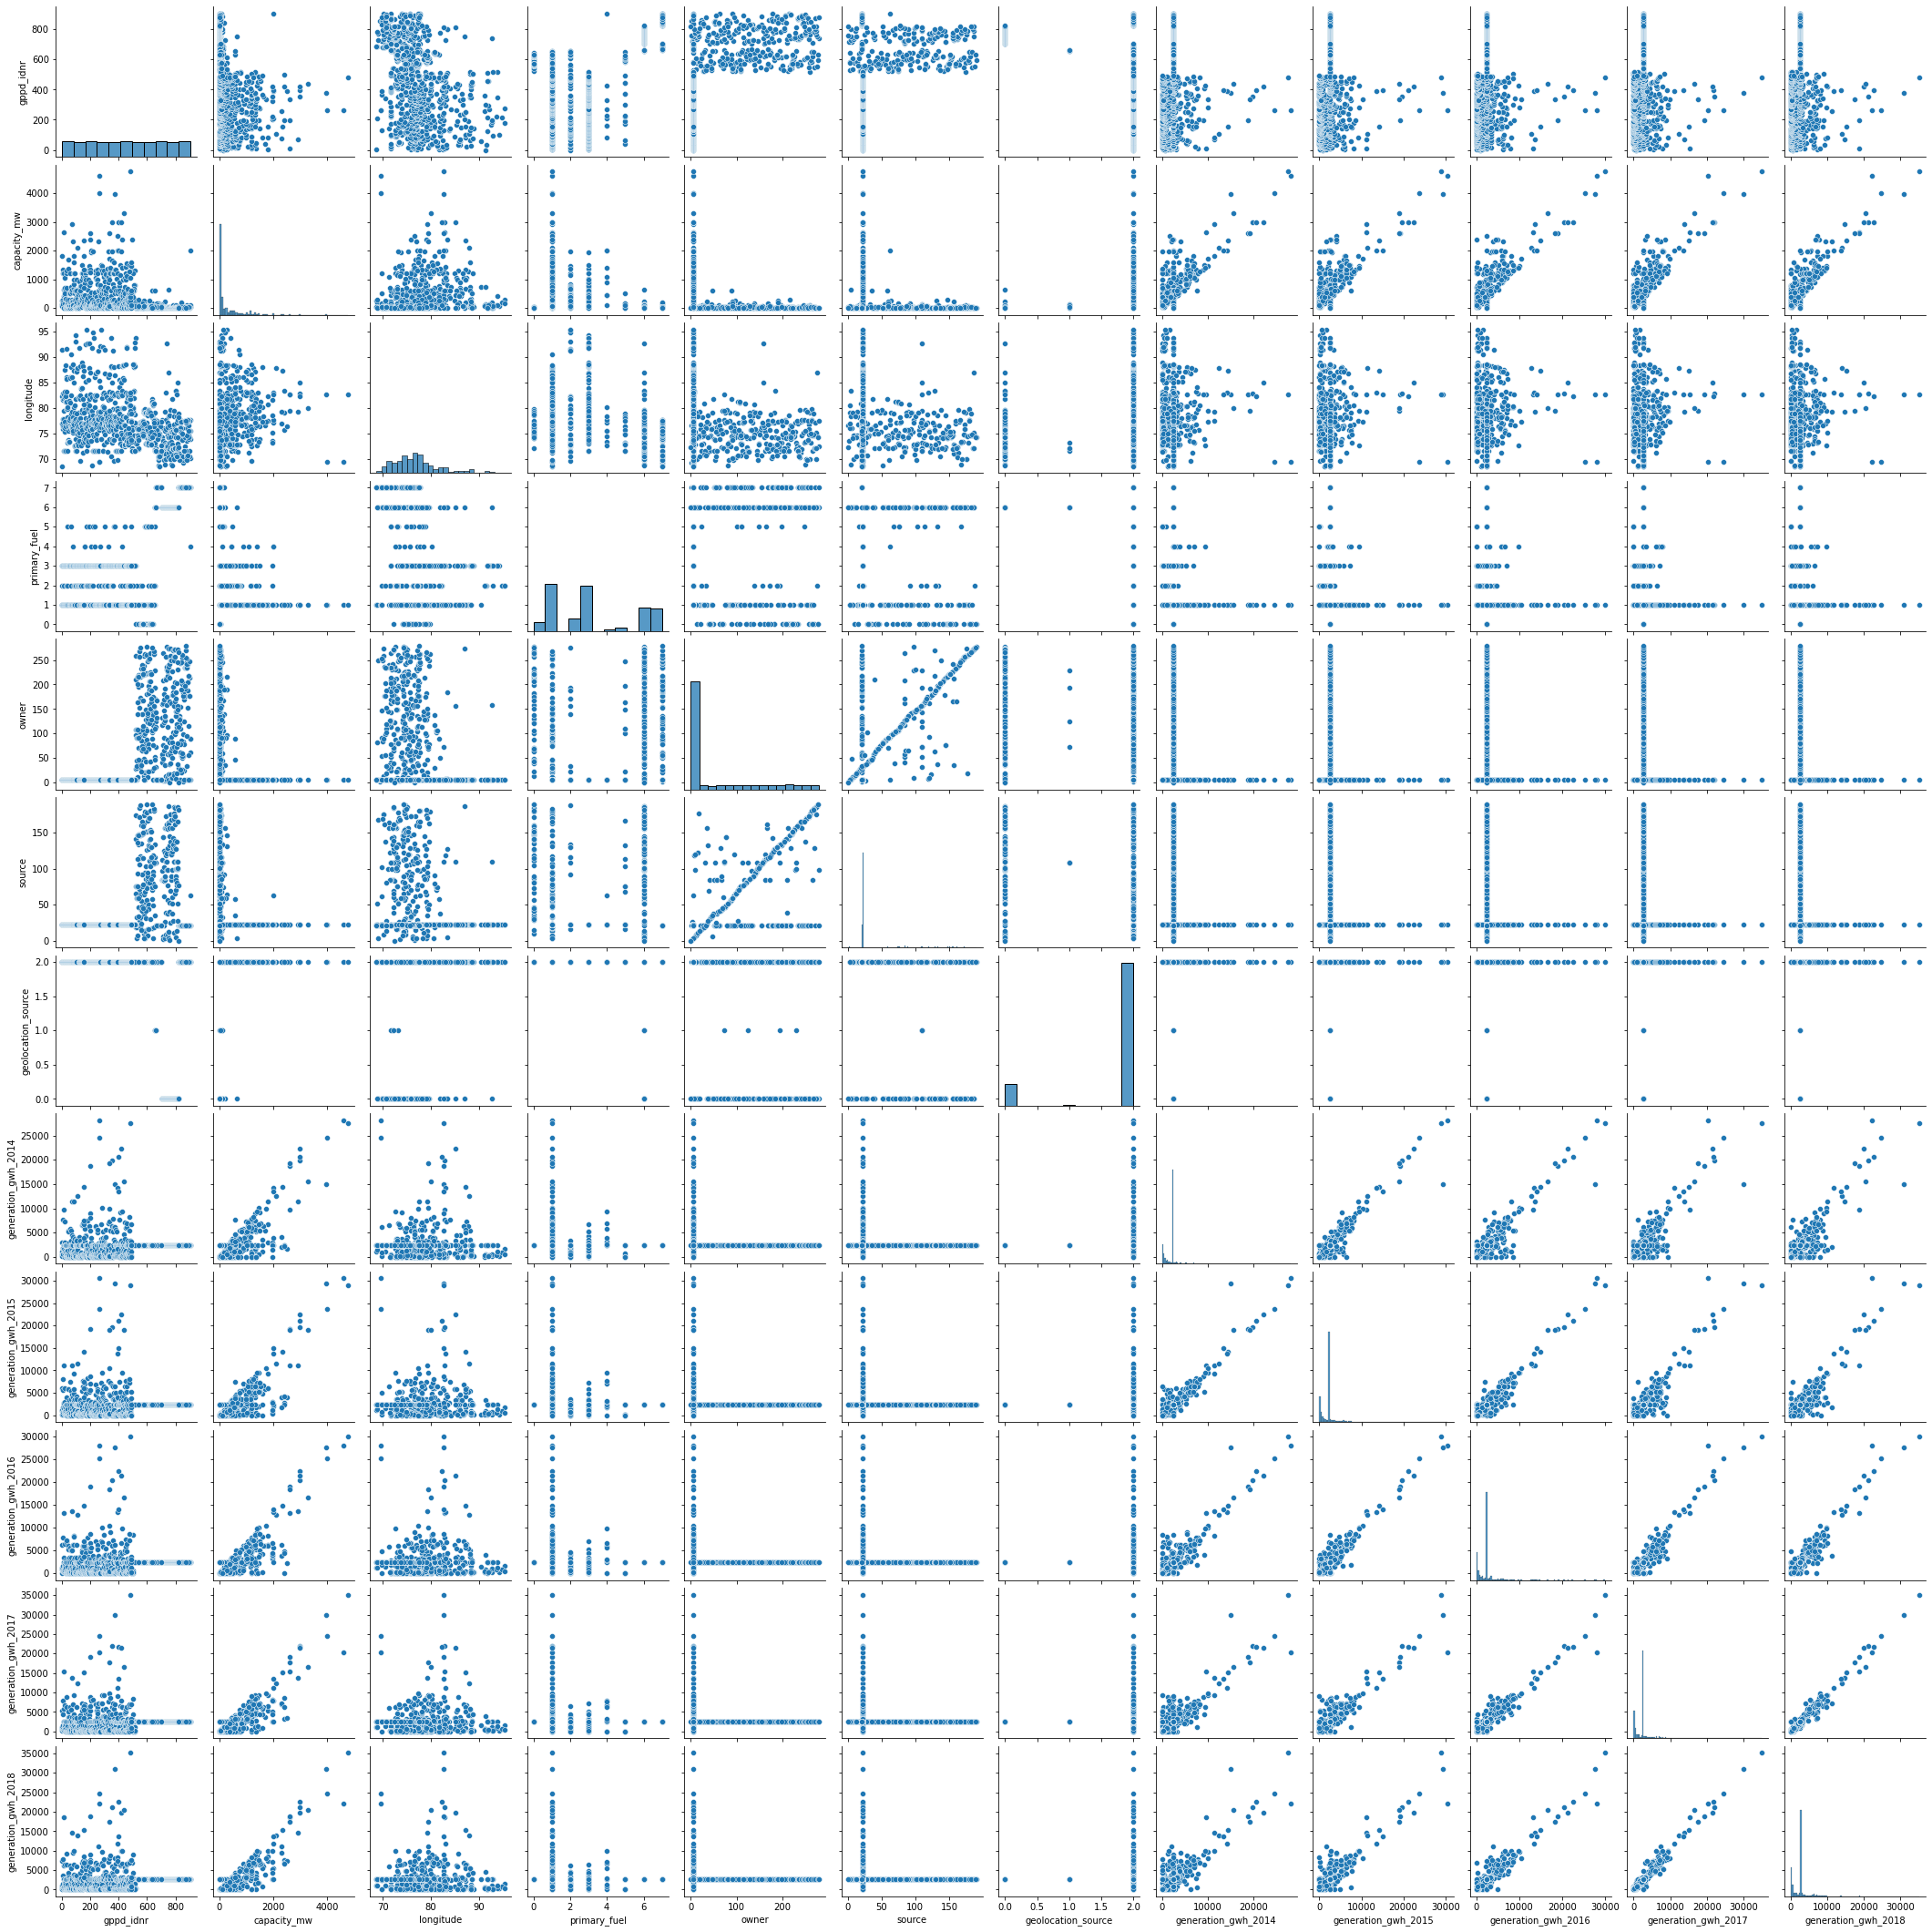

In [31]:
#Drawing a pairplot to view the correlation
sns.pairplot(df2)

In [32]:
df2.columns

Index(['gppd_idnr', 'capacity_mw', 'longitude', 'primary_fuel', 'owner',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

we had already seen in distribution plot and box plot in part 1 that data has outliers which are to be removed hence i will not repeat few EDA steps which had been done earlier

We will remove outliers using z score method

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

,gppd_idnr,capacity_mw,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.779137,0.548908,0.790446,1.225688,2.095328,1.460215,1.083349,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
1,0.252074,0.386977,0.515337,0.967877,2.446913,2.917019,0.394241,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
2,1.527719,0.486679,1.568043,1.664401,0.656734,0.512075,0.394241,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
3,1.730142,0.324240,2.852648,0.529164,0.620363,0.489662,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.726323,2.498942,1.052946,0.967877,0.620363,0.489662,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.145133,2.159821,0.037134,0.967877,0.620363,0.489662,0.394241,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,1.409321,0.548060,0.199710,1.225688,0.701112,0.743019,2.560940,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
904,1.672853,0.509909,0.319887,1.664401,0.620363,0.512075,0.394241,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
905,0.328460,0.417498,0.688509,0.967877,0.422268,0.339596,0.394241,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16


In [34]:
z=np.abs(zscore(df2))

In [35]:
z.shape

(907, 12)

In [36]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 244, 299,
       308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 345, 360, 363,
       364, 364, 364, 364, 364, 364, 375, 416, 427, 482, 493, 493, 493,
       493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 577, 638,
       648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 661,
       669, 689, 695, 695, 695, 695, 695, 695, 721, 721, 721, 721, 724,
       724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 767, 786, 786,
       786, 786, 786, 786, 788, 808, 808, 808, 808, 808, 808, 818, 832,
       870, 871, 879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64), array([ 1,  8,  9, 10, 11,  5,  5,  1,  7,  8,  9, 10, 11,  1,  7,  2,  2,
        5,  1,  7,  8,  9, 10, 11,  2,  5,  1,  7,  8,  9, 10, 11,  5,  2,
        2,  2,  5,  2,  1,  1,  7,  8,  9, 10, 11,  1,  2,  2,  1,  1,  7,
        8,  9, 10, 11,  1,  7,  8,  9, 10, 11,  2

In [37]:
len(np.where(z>3)[0])

128

In [38]:
df3=df2[(z<3).all(axis=1)]

In [39]:
print("old dataframe",df2.shape)
print("new dataframe",df3.shape)
print("total dropped",df2.shape[0]-df3.shape[0])

old dataframe (907, 12)
new dataframe (855, 12)
total dropped 52


In [40]:
loss_percent=(907-855)/907*100
print(loss_percent,"%")
#here by removing the outliers loosign 5.6% of data which is fine as it will help in gettign better model accuracy

5.733186328555679 %


In [41]:
#we will now check skewness in data
df3.skew()

gppd_idnr             -0.018915
capacity_mw            1.991352
longitude              0.965527
primary_fuel           0.426383
owner                  1.359731
source                 1.824481
geolocation_source    -2.146157
generation_gwh_2014    1.506912
generation_gwh_2015    1.380454
generation_gwh_2016    1.404078
generation_gwh_2017    1.273388
generation_gwh_2018    1.312174
dtype: float64

In [42]:
# We will break data into input and output and then remove skewness
x=df3.drop("capacity_mw",axis=1)
y=df3["capacity_mw"]


In [43]:
x

,gppd_idnr,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657.0,73.2407,6.0,229.0,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519.0,74.6090,1.0,258.0,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853.0,69.3732,7.0,2.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0.0,91.3602,2.0,5.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1.0,82.4091,1.0,5.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,77.3568,1.0,5.0,22.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822.0,78.1654,6.0,114.0,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891.0,75.5811,7.0,5.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539.0,73.7477,1.0,91.0,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [44]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 855, dtype: float64

In [45]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)

,Variables,VIF Factor
0,gppd_idnr,10.437368
1,longitude,31.418400
2,primary_fuel,6.300358
3,owner,4.788552
4,source,6.200818
5,geolocation_source,13.677179
6,generation_gwh_2014,15.640646
7,generation_gwh_2015,29.482928
8,generation_gwh_2016,34.666395
9,generation_gwh_2017,40.496711


We will drop source from the above as the VIF is close to primary_fuel to remove multicolliniarity

In [46]:
x1=x.drop("source",axis=1)
x1

,gppd_idnr,longitude,primary_fuel,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657.0,73.2407,6.0,229.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519.0,74.6090,1.0,258.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853.0,69.3732,7.0,2.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0.0,91.3602,2.0,5.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1.0,82.4091,1.0,5.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,491.0,77.3568,1.0,5.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822.0,78.1654,6.0,114.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891.0,75.5811,7.0,5.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539.0,73.7477,1.0,91.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [47]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [48]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0   -0.298449
1    0.032525
2   -0.056596
3    0.451346
4   -2.117737
5   -0.259175
6   -0.315885
7   -0.317184
8   -0.346975
9   -0.356184
dtype: float64

In [49]:
#using Min Max Scaling technique
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
xf=st.fit_transform(x2)
xf

array([[0.79302507, 0.35600334, 0.91726681, ..., 0.4708886 , 0.49526768,
        0.5075887 ],
       [0.66878082, 0.43875555, 0.27233411, ..., 0.4708886 , 0.49526768,
        0.5075887 ],
       [0.95745861, 0.06588269, 1.        , ..., 0.4708886 , 0.49526768,
        0.5075887 ],
       ...,
       [0.98803327, 0.49236428, 1.        , ..., 0.4708886 , 0.49526768,
        0.5075887 ],
       [0.68731928, 0.38771718, 0.27233411, ..., 0.4708886 , 0.49526768,
        0.5075887 ],
       [0.97600933, 0.58601343, 1.        , ..., 0.4708886 , 0.49526768,
        0.5075887 ]])

As the output is a continues variable we will use Linear Regression technique and to do that we will find the best random state to apply

In [53]:
from sklearn.metrics import r2_score
maxr2=0
maxRS=0
lr=LinearRegression()
for i in range(0,100):
    xf_train,xf_test,y_train,y_test=train_test_split(xf,y,test_size=0.2,random_state=i)
    lr.fit(xf_train,y_train)
    predlr=lr.predict(xf_test)
    r2score=r2_score(y_test,predlr)
    print('r2score',r2score,'randome state',i)
    if r2score>maxr2:
        maxr2=r2score
        maxRS=i
        
print("Best r2 score is",maxr2,"on Random State",maxRS)

r2score 0.4016088773581056 randome state 0
r2score 0.5037178468333552 randome state 1
r2score 0.47943214242351007 randome state 2
r2score 0.5252468698242103 randome state 3
r2score 0.4810976825578499 randome state 4
r2score 0.45480867190973195 randome state 5
r2score 0.6243100412814662 randome state 6
r2score 0.4218484082684365 randome state 7
r2score 0.4328951750459543 randome state 8
r2score 0.4447978682957313 randome state 9
r2score 0.5827431771868055 randome state 10
r2score 0.4985386341477689 randome state 11
r2score 0.39140690172744264 randome state 12
r2score 0.49234058498570155 randome state 13
r2score 0.49261207037644716 randome state 14
r2score 0.4782386748864398 randome state 15
r2score 0.5164346867834799 randome state 16
r2score 0.5125368912398076 randome state 17
r2score 0.3221439612788226 randome state 18
r2score 0.4864092559407218 randome state 19
r2score 0.34513557257668914 randome state 20
r2score 0.5069312330312169 randome state 21
r2score 0.5347189409615878 randome s

In [54]:
#using random state 80 in Linear Regression model
xf_train,xf_test,y_train,y_test=train_test_split(xf,y,test_size=0.2,random_state=80)
lr.fit(xf_train,y_train)
predlr=lr.predict(xf_test)
print(r2_score(y_test,predlr))
cvscore=cross_val_score(lr,xf,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.6341031218704389
cross val score: 0.45319027761030756


********Tuning the parameters

In [55]:
#Hypertuning , getting best parameters
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(xf_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [56]:
#applying the same parameters
ls=Lasso(alpha=1,random_state=0)
ls.fit(xf_train,y_train)
ls.score(xf_train,y_train)
pred_ls=ls.predict(xf_test)
print(r2_score(y_test,pred_ls))
cvscore1=cross_val_score(ls,xf,y,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.6230481656912602
cross val score: 0.4654325374571194


In [57]:
#Trying with Ridge regression technique for hypertuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
cl=GridSearchCV(rd,parameters)
cl.fit(xf_train,y_train)
print(cl.best_params_)

{'alpha': 1, 'random_state': 0}


In [58]:
#applying the same
rd=Ridge(alpha=1,random_state=0)
rd.fit(xf_train,y_train)
rd.score(xf_train,y_train)
pred_rd=rd.predict(xf_test)
print(r2_score(y_test,pred_rd))
cvscore2=cross_val_score(rd,xf,y,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.6286463307680925
cross val score: 0.46304022516212606


Above are no better than Linear Regression so we will trying ensembling 

In [59]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(xf_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [74]:
#Applying the crieterias
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(xf_train,y_train)
rf.score(xf_train,y_train)
pred_decision=rf.predict(xf_test)
print(r2_score(y_test,pred_decision))
cvscore3=cross_val_score(rf,xf,y,cv=7)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.7974048238876825
cross val score: 0.7770460317988491


From the above model testing we tried multiple hypertuning techniques with best parameters for continues data output
as Ridge,Lasso and Random Forest Regressor and with Random Forest Regressor we get best r2 score with a very close Cross Val score
 hence we will save this model

In [75]:
#we will save this model
import pickle


In [76]:
filename='capacitymodel.pkl'
pickle.dump(rf,open(filename,'wb'))


In [77]:
#Conclusion 
loaded_model=pickle.load(open('capacitymodel.pkl','rb'))
result=loaded_model.score(xf_test,y_test)
print(result)

0.7974048238876825


In [78]:
#conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:],pred_decision[:]],index=["Predicted","Original"])
#predicting the sales using the model saved
conclusion=pd.DataFrame([loaded_model.predict(xf_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
Predicted,81.7495,5.324,13.0305,166.9942,111.4835,1218.78,45.991,1441.8428,427.0072,309.91176,...,1282.975,165.53266,760.992,629.6205,6.353,24.2245,326.8249,5.923,838.806,21.523
Original,81.7495,5.324,13.0305,166.9942,111.4835,1218.78,45.991,1441.8428,427.0072,309.91176,...,1282.975,165.53266,760.992,629.6205,6.353,24.2245,326.8249,5.923,838.806,21.523
